In [1]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.2 MB/s eta 0:00:00


In [2]:
import ultralytics
print(ultralytics.__version__)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.221


In [3]:
from datasets import load_dataset
from ultralytics import YOLO

ds=load_dataset("HuangYiYang/Face-Mask-Detection-Dataset")
model=YOLO("yolo11n.pt")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

dataset.zip:   0%|          | 0.00/133M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3833 [00:00<?, ? examples/s]

In [4]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3833
    })
})


In [5]:
images = ds["train"]["image"]
print(f"Total images: {len(images)}")

Total images: 3833


In [6]:
results = [model(image) for image in images]


0: 640x512 1 person, 48.4ms
Speed: 22.9ms preprocess, 48.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)

0: 640x384 1 person, 47.4ms
Speed: 2.0ms preprocess, 47.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x480 (no detections), 49.6ms
Speed: 2.2ms preprocess, 49.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)

0: 640x544 1 person, 50.4ms
Speed: 2.9ms preprocess, 50.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 544)

0: 640x448 2 persons, 49.4ms
Speed: 2.2ms preprocess, 49.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 person, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)

0: 640x480 1 car, 8.2ms
Speed: 2.3ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

0: 640x448 1 person, 1 refrigerator, 10.7ms
Speed: 2.5ms preprocess, 10.7ms inference, 2.0ms postprocess per image 

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Streaming output truncated to the last 5000 lines.
0: 608x640 (no detections), 11.3ms
Speed: 3.2ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 640)

0: 640x640 (no detections), 11.3ms
Speed: 3.1ms preprocess, 11.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 608x640 1 person, 12.0ms
Speed: 3.5ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)

0: 576x640 1 person, 11.0ms
Speed: 3.1ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)

0: 576x640 1 person, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)

0: 576x640 (no detections), 11.3ms
Speed: 3.3ms preprocess, 11.3ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 640)

0: 512x640 (no detections), 11.4ms
Speed: 3.4ms preprocess, 11.4ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)

0: 640x640 1 person, 10.1ms
Speed: 3.3ms 


0: 640x416 1 person, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)


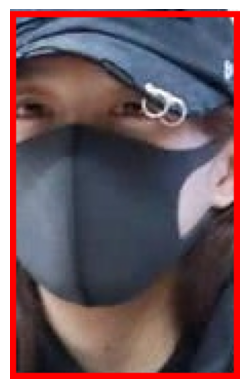


0: 608x640 1 person, 9.4ms
Speed: 2.8ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


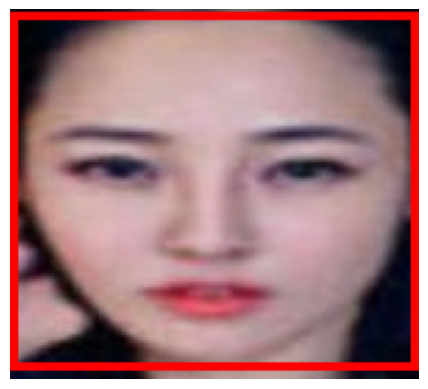


0: 640x576 1 person, 9.7ms
Speed: 3.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 576)


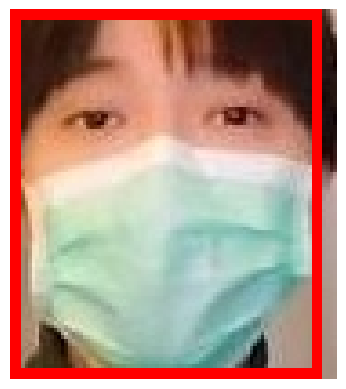


0: 608x640 1 person, 10.3ms
Speed: 2.9ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


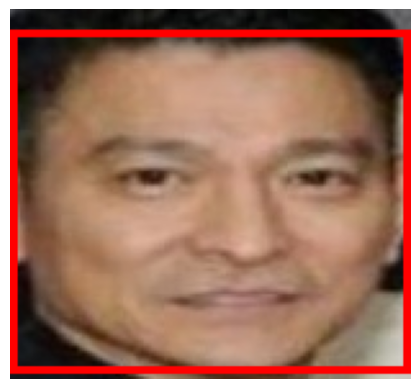


0: 640x416 1 person, 13.5ms
Speed: 2.3ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)


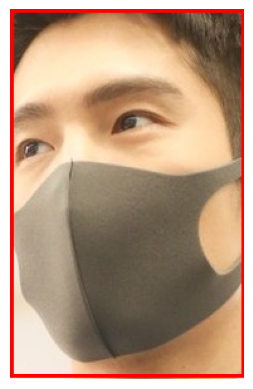

In [19]:
import random
sample_indices= random.sample(range(len(images)), 5)
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

for idx in sample_indices:
  image=images[idx]
  result=model(image)[0]

  im = image.convert("RGB")
  draw = ImageDraw.Draw(im)
  for box in result.boxes.xyxy:
      x1, y1, x2, y2 = box
      draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

  plt.imshow(im)
  plt.axis("off")
  plt.show()